In [35]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

import pandas as pd

from sklearn import preprocessing

from sklearn import tree 
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from IPython.display import Image

In [36]:
data = pd.read_csv('dataset/Code-H.csv')
data = data.drop(data.index[[0]])
data
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [37]:
cols = data.columns
cols = cols[:-2]
X = data[cols]
y = data['0Symptoms list']
y

1       Acute appendicitis
2       Acute appendicitis
3       Acute appendicitis
4       Acute appendicitis
5       Acute appendicitis
               ...        
5579     Vescicle calculus
5580     Vescicle calculus
5581     Vescicle calculus
5582     Vescicle calculus
5583     Vescicle calculus
Name: 0Symptoms list, Length: 5583, dtype: object

In [38]:
data.head(5)

,Sex Female,Chills,Location -Localised or otherwise,Characteristic Sharp,Characteristic Colicky,Characteristic Burning,Characteristic Throbbing,Eating outside food,Started with spicy Food,Started with fatty meal,Started with Trauma,Started with Medicines like Diclofenac brufen erythromycin or Metrogyl,Started with Alcohol,Started Suddenly,Heartburn,Moves to upper abdomen on right side,Moves to Lower abdomen on right side,Moves to left,Moves to back,Moves to Groin,Aggravated when one coughs,Relieved by Antacid,Appears IntermIttently,Limits movement/ normal breathing,Associated with loose motions,Associated with Constipation,Associated with Fever,Associated with distension,Associated with Jaundice,Associated with red urine,Associated with burning micturation,Associated with headache,Associated with periods,History of previous abdominal surgery,Past History Hernia,Past History regular Alcohol ingestion,Past History other Medical illness like DM,Past History other Medical illnesses HTN,Past History other Medical illnesses TB,History of Trauma,Medicinal History,Missed period,Loss of weight,Loss of appetite,History of white discharge,Past History of Gall stone disease,Caries teeth,Mucus in stool,Blood and mucus in stool,0Symptoms list,Code disease
1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acute appendicitis,CD1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acute appendicitis,CD1
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acute appendicitis,CD1
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acute appendicitis,CD1
5,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Acute appendicitis,CD1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
X

,Sex Female,Chills,Location -Localised or otherwise,Characteristic Sharp,Characteristic Colicky,Characteristic Burning,Characteristic Throbbing,Eating outside food,Started with spicy Food,Started with fatty meal,Started with Trauma,Started with Medicines like Diclofenac brufen erythromycin or Metrogyl,Started with Alcohol,Started Suddenly,Heartburn,Moves to upper abdomen on right side,Moves to Lower abdomen on right side,Moves to left,Moves to back,Moves to Groin,Aggravated when one coughs,Relieved by Antacid,Appears IntermIttently,Limits movement/ normal breathing,Associated with loose motions,Associated with Constipation,Associated with Fever,Associated with distension,Associated with Jaundice,Associated with red urine,Associated with burning micturation,Associated with headache,Associated with periods,History of previous abdominal surgery,Past History Hernia,Past History regular Alcohol ingestion,Past History other Medical illness like DM,Past History other Medical illnesses HTN,Past History other Medical illnesses TB,History of Trauma,Medicinal History,Missed period,Loss of weight,Loss of appetite,History of white discharge,Past History of Gall stone disease,Caries teeth,Mucus in stool,Blood and mucus in stool
1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5580,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5581,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5582,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
multi = [feature_dict['History of previous abdominal surgery']]
sample_x = [1.0 if i in multi else 0*i for i in range(len(features))]
sample_x = np.array(sample_x).reshape(1,len(sample_x))
RandomForestClassifier_model.predict(sample_x)

array(['Functional abdominal pain'], dtype=object)

In [45]:
DecisionTreeClassifier_prediction = DecisionTreeClassifier_model.predict(X_test)
scores = cross_val_score(DecisionTreeClassifier_model, X, y, cv=3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [46]:
scores.mean()

0.993978736936829

In [47]:
from sklearn import tree 
from sklearn.tree import export_graphviz

# export_graphviz(DecisionTreeClassifier_model, 
#                 out_file='DOT-files/tree.dot', 
#                 feature_names=cols)

importances = DecisionTreeClassifier_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols
for f in range(10):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 21 - Relieved by Antacid (0.220150)
2. feature 40 - Medicinal History (0.143575)
3. feature 27 - Associated with distension (0.117152)
4. feature 31 - Associated with headache (0.114591)
5. feature 42 - Loss of weight (0.074217)
6. feature 12 - Started with Alcohol (0.053621)
7. feature 2 - Location -Localised or otherwise (0.052760)
8. feature 18 - Moves to back  (0.052644)
9. feature 17 - Moves to left (0.034773)
10. feature 6 - Characteristic Throbbing (0.027615)


In [48]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i
print(feature_dict)
multi = [feature_dict['Associated with Constipation'], feature_dict['History of previous abdominal surgery'], feature_dict['Associated with distension']]
multi2 = [feature_dict['Location -Localised or otherwise'], feature_dict['Characteristic Burning']]
multi3 = [feature_dict['Location -Localised or otherwise'], feature_dict['Characteristic Burning'], feature_dict['Started Suddenly']]

{'Sex Female': 0, 'Chills': 1, 'Location -Localised or otherwise': 2, 'Characteristic Sharp': 3, 'Characteristic Colicky': 4, 'Characteristic Burning': 5, 'Characteristic Throbbing': 6, 'Eating outside food': 7, 'Started with spicy Food': 8, 'Started with fatty meal': 9, 'Started with Trauma': 10, 'Started with Medicines like Diclofenac brufen erythromycin or Metrogyl': 11, 'Started with Alcohol': 12, 'Started Suddenly': 13, 'Heartburn': 14, 'Moves to upper abdomen on right side ': 15, 'Moves to Lower abdomen on right side ': 16, 'Moves to left': 17, 'Moves to back ': 18, 'Moves to Groin': 19, 'Aggravated when one coughs': 20, 'Relieved by Antacid': 21, 'Appears IntermIttently': 22, 'Limits movement/ normal breathing': 23, 'Associated with loose motions': 24, 'Associated with Constipation': 25, 'Associated with Fever': 26, 'Associated with distension': 27, 'Associated with Jaundice': 28, 'Associated with red urine': 29, 'Associated with burning micturation': 30, 'Associated with headac

In [49]:
sample_x = [1.0 if i in multi2 else 0*i for i in range(len(features))]

In [50]:
print(sample_x)

[0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [51]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
print(sample_x)

[[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [52]:
DecisionTreeClassifier_model.predict(sample_x)

array(['UTI'], dtype=object)

In [53]:
DecisionTreeClassifier_model.predict_proba(sample_x)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [54]:
# Random Forest

In [55]:
RandomForestClassifier_model = RandomForestClassifier(n_estimators=100)
RandomForestClassifier_model.fit(X, y)
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [56]:
# multi = [feature_dict['Started Suddenly'], feature_dict['Moves to back '], feature_dict['Started with Medicines like Diclofenac brufen erythromycin or Metrogyl'], feature_dict['Started with Trauma'], feature_dict['Medicinal History']]
# test = [feature_dict['Sex Female'], feature_dict['Chills'], feature_dict['Characteristic Burning'], feature_dict['Past History other Medical illness like DM'], feature_dict['Associated with burning micturation']]
test1 = [feature_dict['Caries teeth'], feature_dict['Characteristic Burning'], feature_dict['Heartburn'], feature_dict['Associated with headache']]

sample_x = [10.0 if i in test1 else 1.0 for i in range(len(features))]
# print(sample_x)
sample_x = np.array(sample_x).reshape(1,len(sample_x))
# RandomForestClassifier_model.predict_proba(sample_x)
RandomForestClassifier_model.predict(sample_x)

array(['Acute gastritis '], dtype=object)

In [57]:
# RandomForestClassifier_model.predict_proba(sample_x)
x = zip(RandomForestClassifier_model.classes_, RandomForestClassifier_model.predict_proba(sample_x)[0])
for i in x:
    print(i)

('Acute Exacerbation of DU', 0.11)
('Acute Gastroenteritis', 0.07)
('Acute Pancreatitis', 0.07)
('Acute appendicitis', 0.0)
('Acute cholangitis', 0.04)
('Acute cholecystitis', 0.0)
('Acute colonic Diverticulitis with perforation', 0.09)
('Acute colonic diverticulitis', 0.0)
('Acute gastritis ', 0.18)
('Acute hepatitis', 0.01)
('Amoebic Colitis', 0.0)
('Aneurysm Dissecting ', 0.0)
('Appendicular abscess', 0.02)
('Appendicular mass', 0.0)
('Choledocholithiasis / Biliary colic', 0.0)
('Chronic Gastritis', 0.0)
('Chronic Pancreatitis', 0.06)
('Functional abdominal pain', 0.03)
('GERD', 0.1)
('Peptic Ulcer', 0.13)
('Perforation Intestine small', 0.0)
('Perforation gastric or duodenal ulcer', 0.06)
('Pneumonia Basal', 0.0)
('Prolapsed disc', 0.0)
('Pyonephrosis', 0.01)
('Renal calculus', 0.0)
('Strangulated Hernia', 0.0)
('UTI', 0.02)
('Ureteric calculus', 0.0)
('Vescicle calculus', 0.0)


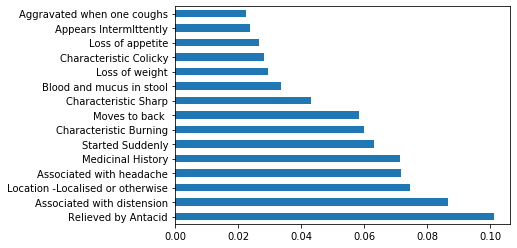

In [58]:
feat_importances = pd.Series(RandomForestClassifier_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [59]:
# Naive Bayes

In [60]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X, y)
# RandomForestClassifier_prediction = RandomForestClassifier_model.predict(X_test)
# print("Random Forest: ", accuracy_score(RandomForestClassifier_prediction, y_test))
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [61]:
multi = [feature_dict['Started Suddenly'], feature_dict['Moves to back '], feature_dict['Started with Medicines like Diclofenac brufen erythromycin or Metrogyl'], feature_dict['Started with Trauma'], feature_dict['Medicinal History']]
test = [feature_dict['Sex Female'], feature_dict['Chills'], feature_dict['Characteristic Burning']]
sample_x = [1.0 if i in test else 0*i for i in range(len(features))]
sample_x = np.array(sample_x).reshape(1,len(sample_x))
GaussianNB_model.predict(sample_x)

array(['Chronic Gastritis'], dtype='<U45')

In [62]:
# RandomForestClassifier_model.predict_proba(sample_x)
x = zip(GaussianNB_model.classes_, GaussianNB_model.predict_proba(sample_x)[0])
for i in x:
    print(i)

('Acute Exacerbation of DU', 0.0)
('Acute Gastroenteritis', 0.0)
('Acute Pancreatitis', 0.0)
('Acute appendicitis', 0.0)
('Acute cholangitis', 0.0)
('Acute cholecystitis', 0.0)
('Acute colonic Diverticulitis with perforation', 0.0)
('Acute colonic diverticulitis', 0.0)
('Acute gastritis ', 0.0)
('Acute hepatitis', 0.0)
('Amoebic Colitis', 0.0)
('Aneurysm Dissecting ', 0.0)
('Appendicular abscess', 0.0)
('Appendicular mass', 0.0)
('Choledocholithiasis / Biliary colic', 0.0)
('Chronic Gastritis', 0.9935125461952938)
('Chronic Pancreatitis', 0.0)
('Functional abdominal pain', 0.006487495320797396)
('GERD', 0.0)
('Peptic Ulcer', 0.0)
('Perforation Intestine small', 0.0)
('Perforation gastric or duodenal ulcer', 0.0)
('Pneumonia Basal', 0.0)
('Prolapsed disc', 0.0)
('Pyonephrosis', 0.0)
('Renal calculus', 0.0)
('Strangulated Hernia', 0.0)
('UTI', 0.0)
('Ureteric calculus', 0.0)
('Vescicle calculus', 0.0)


In [63]:
LinearDiscriminantAnalysis_model = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis_model.fit(X, y)
# RandomForestClassifier_prediction = RandomForestClassifier_model.predict(X_test)
# print("Random Forest: ", accuracy_score(RandomForestClassifier_prediction, y_test))
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [64]:
multi = [feature_dict['Started Suddenly'], feature_dict['Moves to back '], feature_dict['Started with Medicines like Diclofenac brufen erythromycin or Metrogyl'], feature_dict['Started with Trauma'], feature_dict['Medicinal History']]
test = [feature_dict['Sex Female'], feature_dict['Chills'], feature_dict['Characteristic Burning']]
sample_x = [1.0 if i in test else 0*i for i in range(len(features))]
sample_x = np.array(sample_x).reshape(1,len(sample_x))
LinearDiscriminantAnalysis_model.predict(sample_x)

array(['GERD'], dtype='<U45')

In [65]:
x = zip(LinearDiscriminantAnalysis_model.classes_, LinearDiscriminantAnalysis_model.predict_proba(sample_x)[0])
for i in x:
    print(i)

('Acute Exacerbation of DU', 5.780087421437093e-132)
('Acute Gastroenteritis', 0.0)
('Acute Pancreatitis', 8.621230559662592e-246)
('Acute appendicitis', 1.307955097929385e-186)
('Acute cholangitis', 0.0)
('Acute cholecystitis', 4.960631696092678e-196)
('Acute colonic Diverticulitis with perforation', 1.5518791966651895e-220)
('Acute colonic diverticulitis', 4.0840937158847567e-193)
('Acute gastritis ', 2.879889818549084e-57)
('Acute hepatitis', 1.3351022764194568e-140)
('Amoebic Colitis', 3.1447609535925427e-115)
('Aneurysm Dissecting ', 0.0)
('Appendicular abscess', 1.5647932909301615e-125)
('Appendicular mass', 1.5637653132984262e-117)
('Choledocholithiasis / Biliary colic', 0.0)
('Chronic Gastritis', 3.1862042644440945e-26)
('Chronic Pancreatitis', 0.0)
('Functional abdominal pain', 3.640722702626517e-33)
('GERD', 1.0)
('Peptic Ulcer', 6.190897272631837e-141)
('Perforation Intestine small', 2.850858534675129e-211)
('Perforation gastric or duodenal ulcer', 1.37904e-319)
('Pneumonia 

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Symptom','Score']  #naming the dataframe columns
print(featureScores.nlargest(35,'Score'))  #print 10 best feature

                                       Symptom        Score
48                    Blood and mucus in stool  8650.396937
25                Associated with Constipation  5250.000000
6                     Characteristic Throbbing  5042.000000
42                              Loss of weight  4807.720000
17                               Moves to left  4727.580247
23           Limits movement/ normal breathing  4590.889952
4                       Characteristic Colicky  4575.396371
19                              Moves to Groin  4495.081967
31                    Associated with headache  4418.000000
15       Moves to upper abdomen on right side   4177.926829
20                  Aggravated when one coughs  4170.595792
40                           Medicinal History  4129.263538
3                         Characteristic Sharp  3974.000000
18                              Moves to back   3894.000000
22                      Appears IntermIttently  3882.757895
30         Associated with burning mictu

[3.86626193e-04 4.46346051e-03 7.31179494e-02 3.89957267e-02
 3.17424709e-02 7.74162471e-02 1.62449431e-02 4.67828727e-03
 1.33873171e-02 3.31693986e-03 5.44944385e-03 6.07569169e-03
 1.78669776e-02 8.51443981e-02 4.39502637e-03 1.10162796e-02
 1.34809564e-02 1.78244373e-02 5.71341904e-02 6.21724034e-03
 2.49882557e-02 9.09546163e-02 2.75554415e-02 1.58682043e-02
 4.12134246e-03 2.91212211e-03 2.08048350e-02 7.43873017e-02
 0.00000000e+00 1.98413215e-03 5.27411982e-03 6.83629763e-02
 0.00000000e+00 0.00000000e+00 3.33645367e-05 8.55053022e-03
 2.33937182e-03 1.59897344e-04 6.61439094e-04 4.19087502e-04
 6.61731099e-02 0.00000000e+00 2.68031427e-02 2.85858878e-02
 0.00000000e+00 7.09004803e-03 1.67036010e-03 7.05990275e-03
 2.48859012e-02]


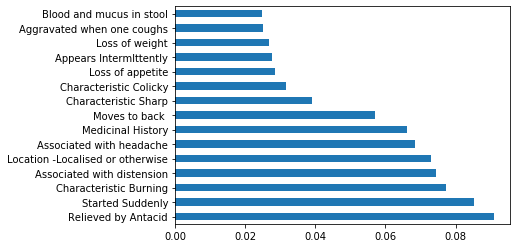

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()